Fund managers report their holdings every month. They don’t want to tell investors they lost money on meme stocks. So at the end of the month, they sell low-quality assets and buy high-quality assets, like bonds.

We might be able to take advantage of this by buying bonds at the end of the month and selling them at the beginning of the month.

Why does this work? The edge is probably too messy, too small, or just not interesting to professionals. Which makes it perfect for us.

Most people over-complicate algorithmic trading - it really can be this simple.

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np

import yfinance as yf

In [15]:
tlt = yf.download("TLT", start="2000-01-01", end="2025-06-30")

[*********************100%***********************]  1 of 1 completed


In [16]:
print(tlt.columns)

MultiIndex([( 'Close', 'TLT'),
            (  'High', 'TLT'),
            (   'Low', 'TLT'),
            (  'Open', 'TLT'),
            ('Volume', 'TLT')],
           names=['Price', 'Ticker'])


In [17]:
tlt.rename(columns={'Close': 'Adj Close'}, inplace=True)

This downloads 5,015 days of price history into a DataFrame.

In [18]:
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

In [19]:
tlt["day_of_month"] = tlt.index.day

tlt["year"] = tlt.index.year

## Let's investigate our Hypothesis
We expect there to be positive returns in TLT toward the end of the month. We expect this because we think fund managers buy TLT at the end of the month. We expect there to be negative returns in TLT toward the beginning of the month. This is when fund managers sell their high-quality assets and go back to buying meme stocks.

In [20]:
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()

<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

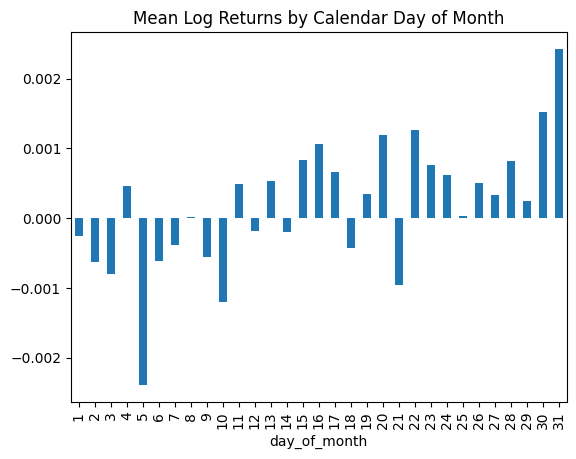

In [21]:
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

We see evidence that returns are positive during the last days of the month and negative during the first.

Lets build a simple strategy to test our strategy:
1. Buy and hold TLT during the last week of the month
2. Short and hold TLT during the first week of the month

This code creates 3 new columns:

first_week_returns - the daily log return if it’s between the 1st and 7th day of the month, otherwise 0

last_week_returns - the daily log return if it's on or after the 23rd day of the month, otherwise 0

last_week_less_first_week - the difference between last_week_returns and first_week_returns

In [22]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[
    tlt.day_of_month <= 7
].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[
    tlt.day_of_month >= 23
].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

Lets create a simple backtest for our strategy. Not highly accurate but the idea is to simply spend as little time as possible to see if the strategy is worth pursuing in more detail

First we will sum up the returns by year and plot them

<Axes: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

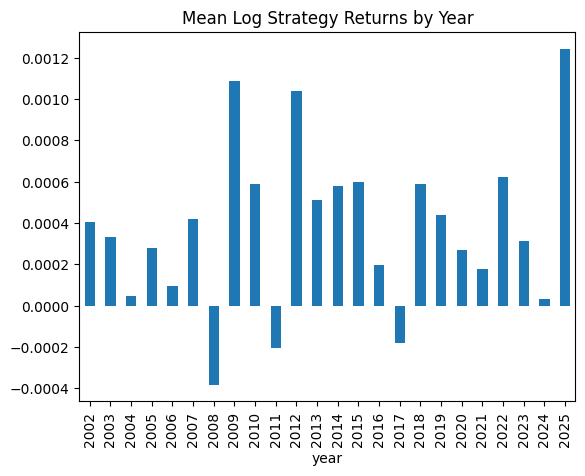

In [24]:
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

We see good evidence that the effect is persitent through time. We only see negative returns for only 3 years in a period of 22 years.

Now, lets focus on cumulative returns

<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

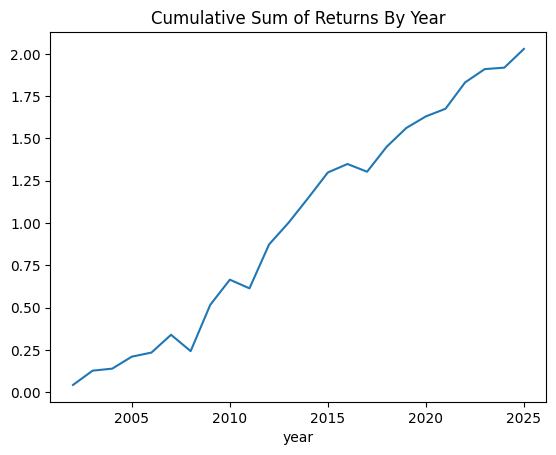

In [25]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
) 

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

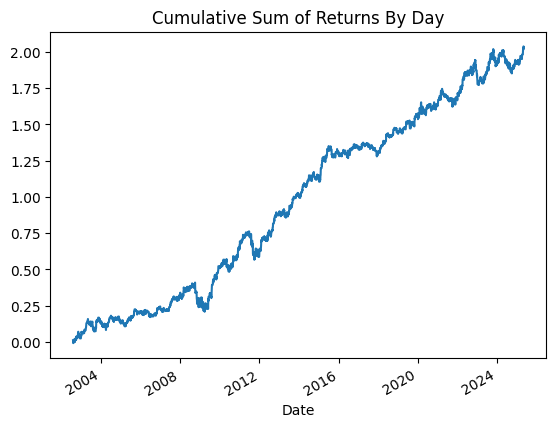

In [26]:
# For day by day
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")